# Plan
1. Understand the Dataset Structure:
    - This dataset contains multiple tables, just like a real company database.
    - Important Tables
        - `Orders.csv` : Each Order + status + stamps
        - `order_items.csv`: Item wise detail of each order
        - `products.cs`v: Product Details
        - `Order.csv`: Order Detail
        - `sellers.csv`: seller info
        - `customers.csv`: customer info
        - `order_payments.csv`: Payment Methods
        - `orders_review.csv`: Customer review text + rating
        - `geolocation.csv`: Lat/Long info
2. Identify Primary Relationships between table:
    - `order_id` is the hub -> connects many tables
    - `product_id` connects items -> products
    - `seller_id` connects sellers -> seller
    - `customer_id` connects order -> customers
    - `order_id` connects orders -> payments -> reviews

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Libraries:
- `pandas` : To analyze, clean, restructure and join different tables.
- `matplotlib.pyplot`: To visualize data to make analysis and describing data easier.
- `seaborn`: To visualize data and analyze data more deeply.

In [58]:
customers = pd.read_csv('./dataset/customers.csv')
geolocations = pd.read_csv('./dataset/geolocations.csv')
order_items = pd.read_csv('./dataset/order_items.csv')
order_payments = pd.read_csv('./dataset/order_payments.csv')
order_reviews = pd.read_csv('./dataset/orders_review.csv')
orders = pd.read_csv('./dataset/orders.csv')
pcnt = pd.read_csv('./dataset/product_category_name_translation.csv')
products = pd.read_csv('./dataset/products.csv')
sellers = pd.read_csv('./dataset/sellers.csv')


# Loading Data
- Loading data into jupyter using pandas
    - `pd.read_csv('file_name.csv')`
- We have assigned the csv names are variables which makes it easier to understand, with which dataset are we working currently.

In [59]:
print(f'''
    Customer Table Columns: {customers.columns} \n
    geolocations Table Columns: {geolocations.columns} \n
    order_items Table Columns: {order_items.columns} \n
    order_payments Table Columns: {order_payments.columns} \n
    order_reviews Table Columns: {order_reviews.columns} \n
    orders Table Columns: {orders.columns} \n
    pcnt Table Columns: {pcnt.columns} \n
    products Table Columns: {products.columns} \n
    sellers Table Columns: {sellers.columns} \n
''')



    Customer Table Columns: Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object') 

    geolocations Table Columns: Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object') 

    order_items Table Columns: Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object') 

    order_payments Table Columns: Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object') 

    order_reviews Table Columns: Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object') 

    orders Table Columns: Index(['order_id', 'customer_id', 'order_status', 'order_purchase

# Understanding what columns exists
- We have output all the column in each dataset table. 
- This will help when are going to join tables and work with the table.

In [60]:
print(f'''
    {customers.info()} 
    {geolocations.info()} 
    {order_items.info()} 
    {order_payments.info()} 
    {order_reviews.info()} 
    {orders.info()} 
    {pcnt.info()} 
    {products.info()} 
    {sellers.info()} 
''')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  

# Table information
- We have used the `info()` function to check the details of all tabel.
- This shows:
    - Length of data
    - Dtype of the columns
    - are they null or non-non
    - Column names
    - Number of Columns

- We found out that all the tables do not have any null value
- As all the tables have columns with non-null type.

In [61]:
orders[['Date','Time']] = orders['order_purchase_timestamp'].str.split(' ',expand=True)

orders['Date'] = pd.to_datetime(orders['Date'])
orders['Time'] = pd.to_datetime(orders['Time'],format='%H:%M:%S').dt.time

orders['Date'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 99441 entries, 0 to 99440
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
99441 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 777.0 KB


# Type Conversion (orders table)

- Timestamp of orders was in object datatype.
- This would have caused it to not work properly when setting up visual.
- To change the dtype:
    - `table['column'] = pd.to_datetime(table['column']).dt.date`
- This will change the dtype from `object` to `datetime`.
- But still this has both date and the time in single column. 
- So we do:
   - `table[['column1','column2']] = table['tosplit'].str.split(' ', expand=True)`
- This is generate two new column with names given by spitting the timestamp column into two

Text(0.5, 1.0, 'Order Payment Value Distribution')

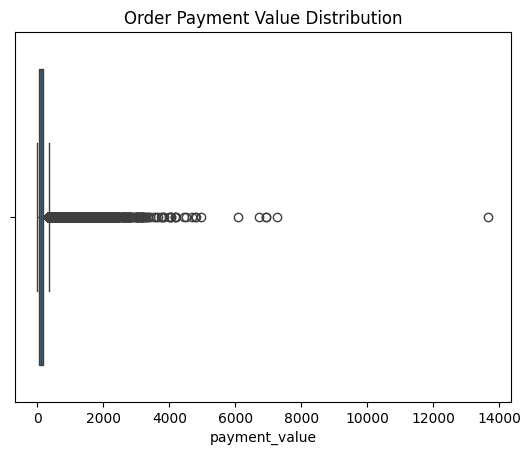

In [62]:
df = orders.merge(order_payments, on='order_id', how='left')
order_total = df.groupby('order_id')['payment_value'].sum().reset_index()

order_outliers = orders.merge(order_total, on='order_id', how='left')

sns.boxplot(x=order_outliers['payment_value'])
plt.title('Order Payment Value Distribution')


# Outlier Check on Orders

1. Most payments are very small
    - The entire box is squeezed on the left side, indicating that:
        - Majority if customers make low-value purchases.
        - The typical order_value is far below 500rs
    - This is Expected in marketplace with low-cost items.
2. Long tail of high-value orders:
    - Multiple points appear far to the right, including values around:
        - 3000
        - 5000
        - 7000
        - 14000 
    - These present:
        - Bulk orders
        - High ticket items
        - Multi-item Purchase
        - Customer Paying via multiple installments
3. Presence of multiple extreme outliers:
    - The points far from the box indicate very high value payments.
    - These are unusual comapared to the majority and may need futher investigation:
        - Are these corporate buyers.
        - Specific Product Categories.
        - Sellers with expensive listing.

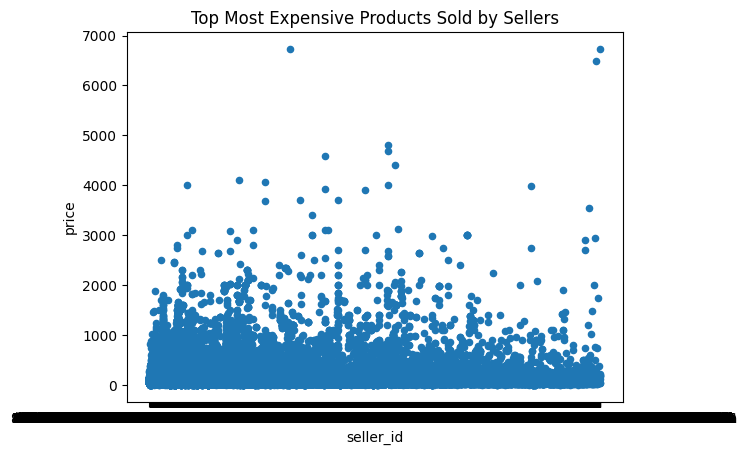

In [63]:
expensive_sellers = order_items.groupby('seller_id')[['seller_id','product_id','price']].head(100000).reset_index()
expensive_sellers_product = expensive_sellers.merge(products, on='product_id', how='inner')[['seller_id','price','product_category_name']].reset_index(drop=True)
expensive_sellers_product = expensive_sellers_product.merge(pcnt, on='product_category_name', how='left').drop('product_category_name', axis=1)

expensive_sellers.plot(kind='scatter', x='seller_id', y='price', title='Top Most Expensive Products Sold by Sellers')
plt.show()


# Expensive Sellers Scatter Plot

1. Lower Range:
    - Most of the items are under 1000rs range.
    - These items maybe of daily use 
        - items
        - groceries
        - stationary
        - Low value accesories
2. Mid Range:
    - The mid range if from 1000 and goes to like 3000.
    - These are general use and semi luxury items like
        - Home appliances.
        - Fashion Items.
        - Small Electronics.
        - Mid-range gadgets
3. High Range:
    - The hight range is from 3000 and almost to 7000.
    - A noticeable number of points appear in this band.
    - These items include:
        - Premium Electronics
        - Television
        - Large Appliances.
        - High quality furniture or decor
 


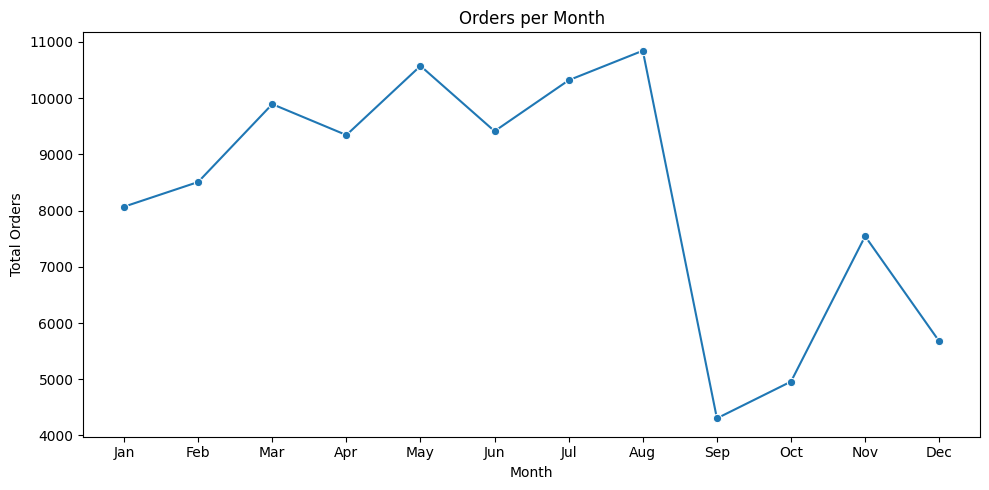

In [64]:
# 1. Make Month column (short name)
orders['Month'] = orders['Date'].dt.strftime('%b')

# 2. Aggregate: orders per month
month_counts = (
    orders.groupby('Month')['order_id']
          .count()
          .reset_index()
)

# 3. Set proper month order on the *aggregated* df
month_order = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']

month_counts['Month'] = pd.Categorical(
    month_counts['Month'],
    categories=month_order,
    ordered=True
)

month_counts = month_counts.sort_values('Month')

# 4. Optional rename
month_counts = month_counts.rename(columns={'order_id': 'Total Orders'})

# 5. Plot from month_counts, not orders
plt.figure(figsize=(10,5))
sns.lineplot(
    data=month_counts,
    x='Month',
    y='Total Orders',
    marker='o',
    errorbar=None
)
plt.title("Orders per Month")
plt.xlabel("Month")
plt.ylabel("Total Orders")
plt.tight_layout()
plt.show()


# Orders Per Month
- After analysis Orders on monthly basis we found out that most of the orders peak in month `Jun` and `Jul` a most. 
- But there are periodic rise in orders every 2 months.
- The reason behind `Jun` and `Jul` rise is the festivals that take place in brazil in `5th` `7th` or `8th` month.
- During these months people tend to order festive items like `costumes`, `new accesories` , etc.
- Once festive season is over orde rate tend to fall as no offers/deals are not available and no festivals.
- We can try to launch new offers or deals in month of `Sept` to give orders a stable rise and fall and not these major falls.

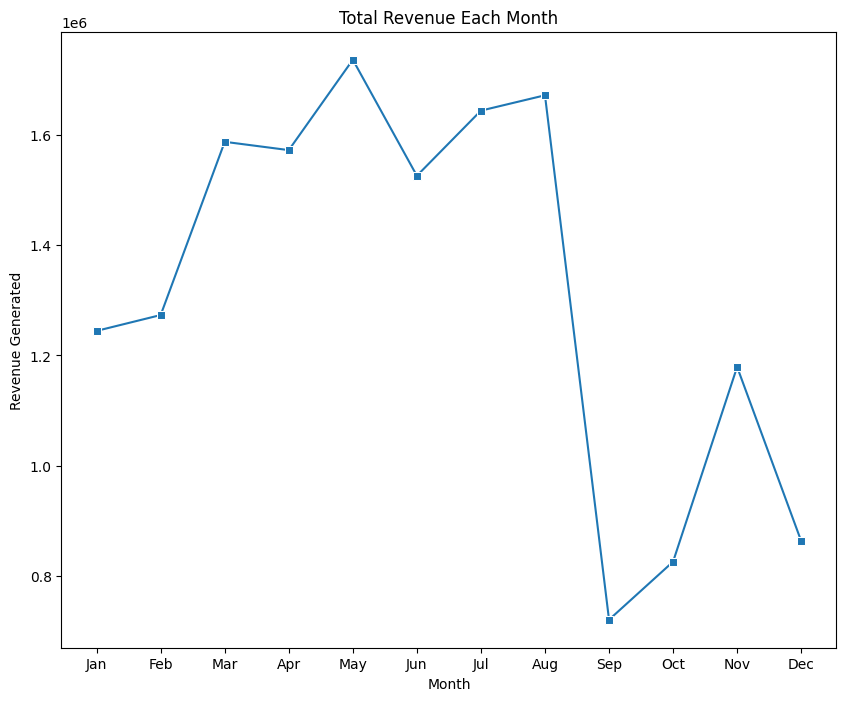

   Month     revenue
4    Jan  1244490.38
3    Feb  1273189.58
7    Mar  1587175.41
0    Apr  1572120.28
8    May  1735972.77
6    Jun  1525640.15
5    Jul  1643699.65
1    Aug  1671513.07
11   Sep   720920.12
10   Oct   826121.21
9    Nov  1179143.77
2    Dec   863566.85


In [65]:
order_items['revenue'] = order_items['freight_value'] + order_items['price']

orders_merged = orders.merge(order_items,on='order_id',how='inner')

total_revenue_Pm = orders_merged.groupby('Month')['revenue'].sum().reset_index()

total_revenue_Pm['Month']= pd.Categorical(
    total_revenue_Pm['Month'],
    categories=month_order,
    ordered=True
)

total_revenue_Pm = total_revenue_Pm.sort_values('Month')

plt.figure(figsize=(10,8))
plt.title('Total Revenue Each Month')

sns.lineplot(data=total_revenue_Pm, errorbar=None, x='Month', y='revenue',marker='s')
plt.xlabel('Month')
plt.ylabel('Revenue Generated')
plt.yticks()
plt.show()
print(total_revenue_Pm)



# Monthly Revenue Trend Analysis

1. Strong Revenue Growth in Early Month:
    - Jan -> May revenue rises steadily, indicating a period of increased customer spending, like due to seasonality or marketing campaigns.
2. Mid Year Stability:
    - Revenue Remains Consistent high during June -> August.
    - This suggest stable period with regular orders flow and strong sales performance.
3. Sharp Drop in September
    - A significant drop can be seen in September, which may include:
        - Seasional Dip
        - Fewer Promotions
        - Operational / Logistics Issue
        - Order Cancellatios or Delays.
4. Late Year Recoverly:
    - Revenue Starts improving again as start of october and reaches a small peak in november, likely due to:
        - Festive season
        - Holiday Shopping Trends
        - Discount Campaigns
5. Slight drop in december:
    - There is a small decline in month of december which could relate to end of year stock issues or shipping slowdowns.


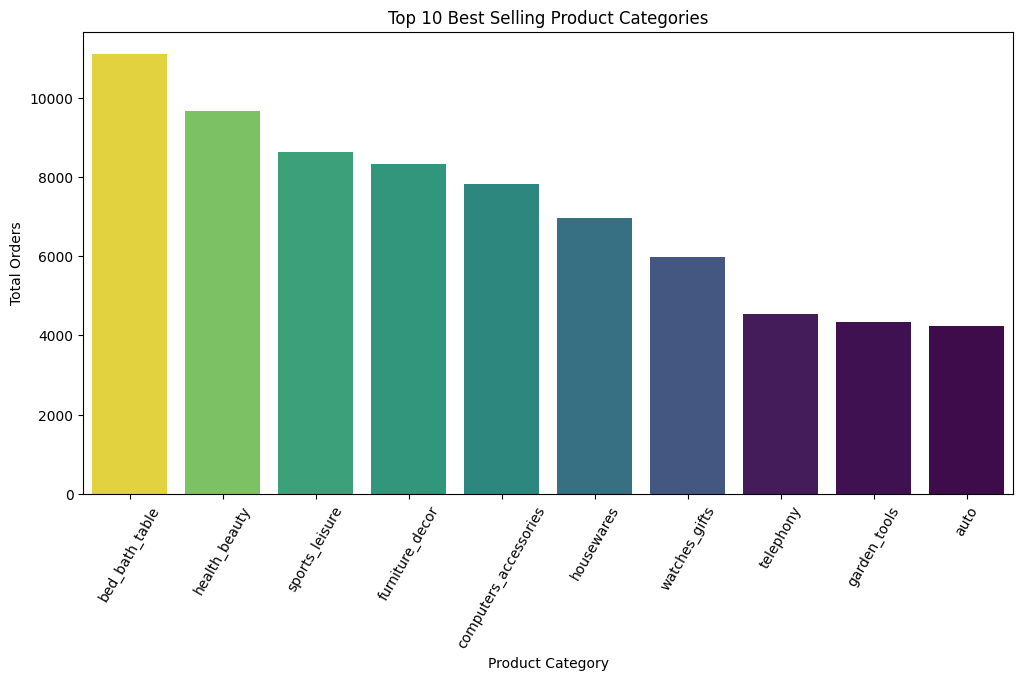

In [66]:
best_selling_categories = order_items.merge(products, on='product_id', how='inner')
best_selling_categories = best_selling_categories.groupby('product_category_name')['order_item_id'].count().reset_index()
best_selling_categories = best_selling_categories.sort_values(by='order_item_id', ascending=False).head(10)

best_selling_categories = best_selling_categories.merge(pcnt, left_on='product_category_name', right_on='product_category_name', how='left')
best_selling_categories = best_selling_categories[['product_category_name_english', 'order_item_id']]
best_selling_categories.columns = ['Product Category', 'Total Orders']
plt.figure(figsize=(12,6))
sns.barplot(data=best_selling_categories, x='Product Category', y='Total Orders', palette='viridis', hue='Total Orders', legend=False)
plt.xticks(rotation=60)
plt.title('Top 10 Best Selling Product Categories')
plt.show()


# Top 10 Products by Total Order Count
- The chart shows the 10 product categories with the highest number of orders. 
- The top category is bed_bath_table, followed by health_beauty and sports_leisure, all with very high order counts. 
- In the middle are furniture_decor, computers_accessories, and housewares with slightly fewer orders. 
- The lowest among the top 10 are watches_gifts, telephony, garden_tools, and auto, which still perform well but have noticeably fewer orders than the leading categories.

Top 1 category code: cama_mesa_banho
Bottom 1 category code: seguros_e_servicos


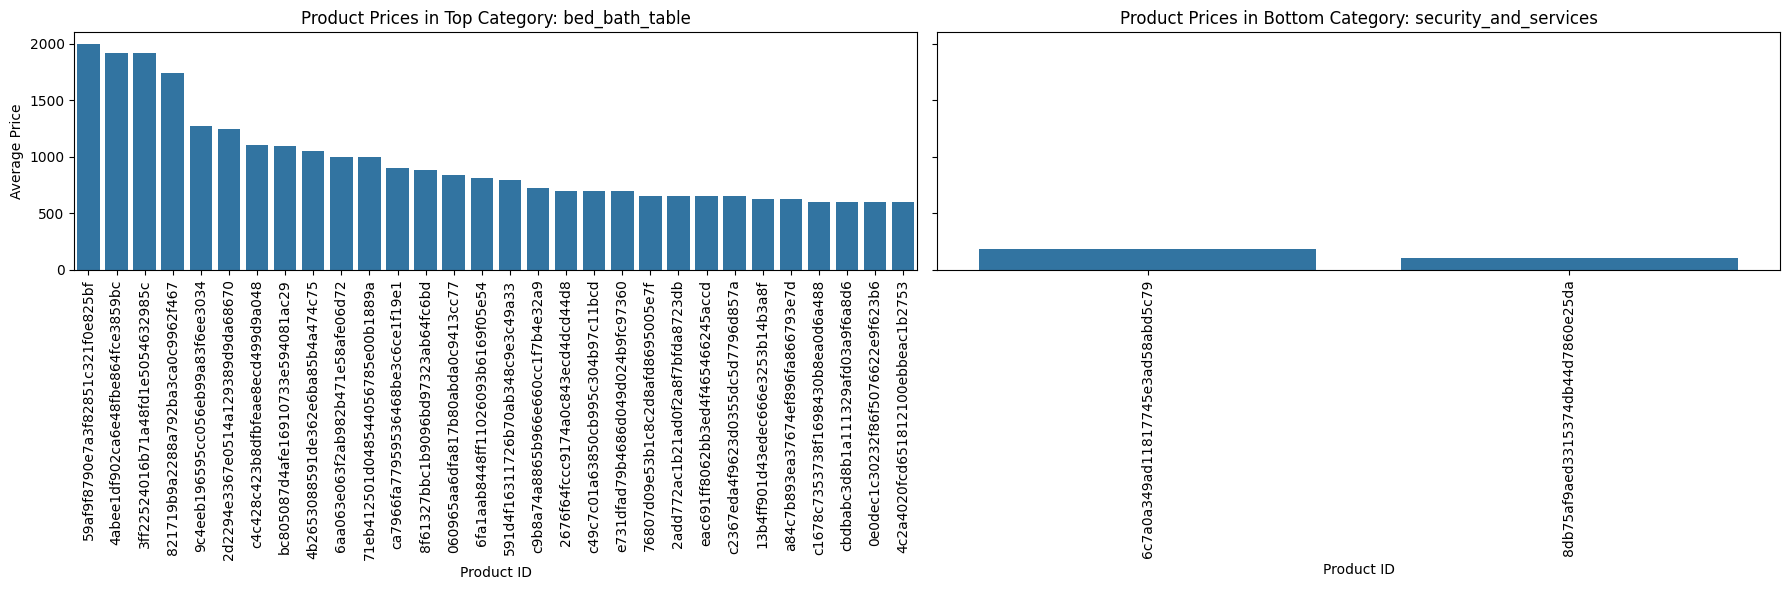

In [67]:
# Base item-level df with category + price
items = order_items.merge(products, on='product_id', how='inner')

# Total orders per category
cat_sales = (
    items
    .groupby('product_category_name')['order_item_id']
    .count()
    .reset_index(name='total_sales')
    .sort_values(by='total_sales',ascending=False)
)

# Top-1 and Bottom-1 category keys
top1_cat = cat_sales.sort_values('total_sales', ascending=False).iloc[0]['product_category_name']
bottom1_cat = cat_sales.sort_values('total_sales', ascending=True).iloc[0]['product_category_name']

print("Top 1 category code:", top1_cat)
print("Bottom 1 category code:", bottom1_cat)

# Filter items belonging to top-1 and bottom-1 categories
top1_items = items[items['product_category_name'] == top1_cat].copy()
bottom1_items = items[items['product_category_name'] == bottom1_cat].copy()

# Avg price per product in each category
top1_prod_price = (
    top1_items
    .groupby('product_id')['price']
    .mean()
    .reset_index()
)

bottom1_prod_price = (
    bottom1_items
    .groupby('product_id')['price']
    .mean()
    .reset_index()
)

# Optional: limit if too many products (e.g., top 30 by price)
top1_prod_price = top1_prod_price.sort_values('price', ascending=False).head(30)
bottom1_prod_price = bottom1_prod_price.sort_values('price', ascending=False).head(30)


def get_cat_name(cat_code):
    row = pcnt[pcnt['product_category_name'] == cat_code]
    if not row.empty:
        return row['product_category_name_english'].iloc[0]
    return cat_code  # fallback

top1_name = get_cat_name(top1_cat)
bottom1_name = get_cat_name(bottom1_cat)


import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
plt.subplots_adjust(wspace=0.4)

# LEFT: Top-1 category
sns.barplot(
    data=top1_prod_price,
    x=top1_prod_price['product_id'].astype(str),
    y='price',
    ax=ax[0]
)
ax[0].set_title(f'Product Prices in Top Category: {top1_name}')
ax[0].set_xlabel('Product ID')
ax[0].set_ylabel('Average Price')
ax[0].tick_params(axis='x', rotation=90)

# RIGHT: Bottom-1 category
sns.barplot(
    data=bottom1_prod_price,
    x=bottom1_prod_price['product_id'].astype(str),
    y='price',
    ax=ax[1]
)
ax[1].set_title(f'Product Prices in Bottom Category: {bottom1_name}')
ax[1].set_xlabel('Product ID')
ax[1].set_ylabel('')  # shared y-axis
ax[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


# Top Category and Bottom Category Analysis

1. Top Category (bed_bath_table):
- Product prices mostly fall between ₹500 and ₹2,000.
- These are everyday household items (towels, bedsheets, table covers, linens).
- Such products have regular purchase cycles — replacements, upgrades, seasonal buying.
- Prices are relatively balanced and affordable, which encourages repeat orders.
- The combination of low price + high utility drives strong overall sales volume.
2. Bottom Category (security_and_services):
- Product prices in this category mostly fall below ₹500, making them inexpensive but also very limited in variety.
- The category contains only two products, typically small security-related items.
- These items usually include basic cameras, door locks, or small security accessories.
- They are not frequent purchases — customers buy them once or only when replacing old units.
- Demand is use-case driven, meaning only customers with a specific need will purchase them.
- Although these products relate to personal security, their low necessity + low variety results in very low sales volume compared to other categories.

In [ ]:
import folium

geolocations = geolocations.rename(columns={'geolocation_zip_code_prefix':'customer_zip_code_prefix'})

cust_geo = geolocations.merge(customers, on='customer_zip_code_prefix', how='inner')
cust_geo = cust_geo.groupby('customer_id')[['geolocation_lat','geolocation_lng']].mean().reset_index()
m = folium.Map(location=[-22.250871,-45.157269],zoom_start = 4)

samplegeo = cust_geo.sample(2000)

for _, row in samplegeo.iterrows():
    folium.CircleMarker(
        location=[row['geolocation_lat'], row['geolocation_lng']],
        radius=1,
        color='blue',
        fill=True,
        fill_opacity=0.5,
        tiles='cartodbpositron'
    ).add_to(m)

m


                            customer_id  geolocation_lat  geolocation_lng
71454  b7df53a300123d644d908e5972f24979       -23.618600       -46.696707
74309  bf1b0c82d25e07c1c4ce59c3b6033648       -22.250871       -45.157269
97228  faf0dae677e3f41793027d0a8ee9e899       -11.945979       -38.082236
74899  c09801227c7f48130b33a8ddb9d91660       -23.188410       -46.853988
11601  1de528add3801283e26459cf6005e3d0       -20.389692       -49.434529


# Gelocation Analysis by customer

1. Southeast Cluster: Sāo Paulo, Rio de Janeiro
- Very dense dots.
- Brazil's largest e-commerce zone.

2. South: Parana, Santa Catarina, Rio Grande do Sul
- Medium Density Cluster below.

3. NorthEast belt: Bahia, Pernambuco, Ceara
- Dots along the coast

4. North: Amazon:
- Fewer Dots
- Sparse Population
- Low e-commerce penetration

5. One dot far above:
- Roraima Region.

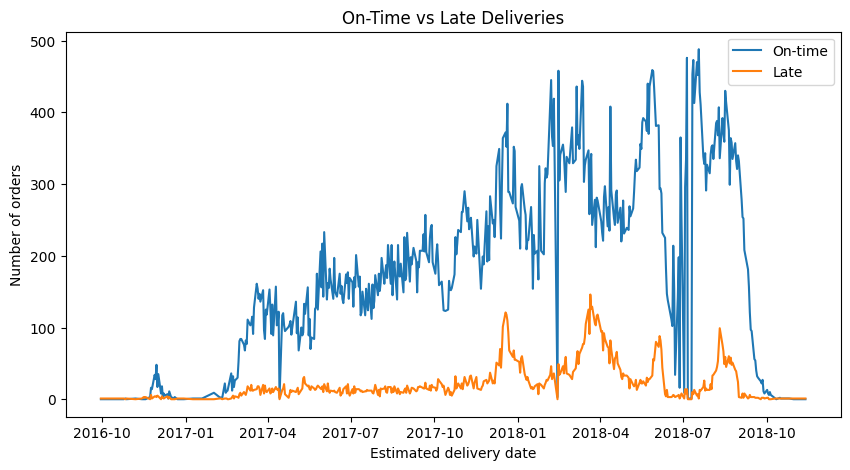

In [69]:


deli = orders.copy()

# convert to datetime, keep NaT for missing
deli['order_estimated_delivery_date'] = pd.to_datetime(
    deli['order_estimated_delivery_date'], errors='coerce'
)
deli['order_delivered_customer_date'] = pd.to_datetime(
    deli['order_delivered_customer_date'], errors='coerce'
)

# 1 = on time (delivered on/before estimate), 0 = late
deli['on_time'] = (
    (deli['order_estimated_delivery_date'] >=
     deli['order_delivered_customer_date'])
    .astype(int)
)

# aggregate per date
daily = deli.groupby('order_estimated_delivery_date')['on_time'].agg(
    on_time='sum',      # number of on‑time deliveries
    total='count'       # total deliveries
)
daily['late'] = daily['total'] - daily['on_time']

# plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=daily, x=daily.index, y='on_time', label='On-time')
sns.lineplot(data=daily, x=daily.index, y='late', label='Late')
plt.title('On-Time vs Late Deliveries')
plt.xlabel('Estimated delivery date')
plt.ylabel('Number of orders')
plt.show()


# On time vs Late Delivery Analysis

1. Early period
    - Order volume is low at the beginning, which is normal for a new company ramping up operations.
    - On‑time deliveries improve toward late 2016, showing maturing logistics, but there is a visible drop in total orders around the end of 2016 and start of 2017.
    
2. Middle period
    - Orders become more stable through most of 2017, with consistently good on‑time performance.
    
    - Late deliveries are rare in this phase, suggesting the delivery process is under control, until a noticeable dip in overall orders appears at the start of 2018.
    
3. Recent period
    - On‑time orders remain high, but there are multiple dates in mid‑2018 (around June–July) where the number of orders is zero, pointing to demand or data gaps rather than delivery issues.
    
    - Late deliveries stay very low, which may just reflect occasional unavoidable delays rather than a systemic delivery problem.layed due to some circumstances.

**In Ending Period of the year due to festive season and a lot of demand for orders there might be delayed in deliveries**


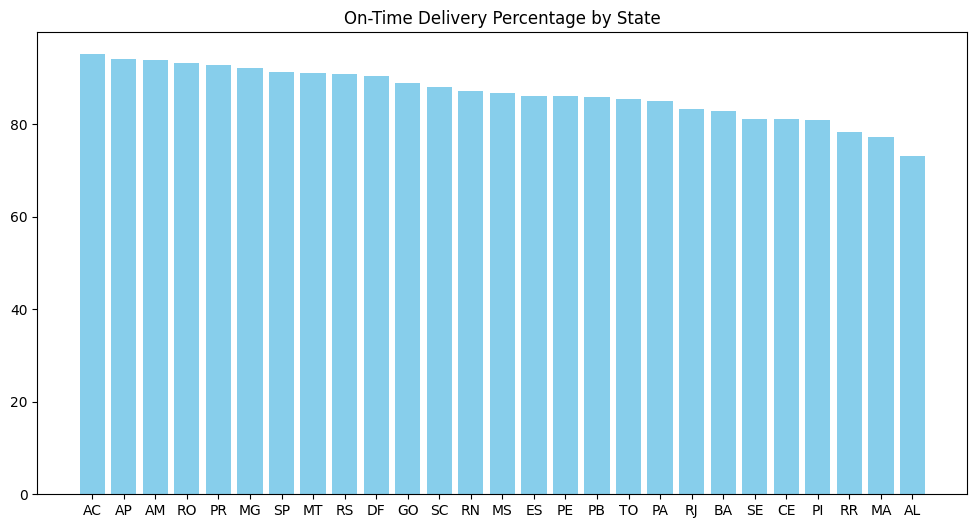

In [70]:
# deli.head()

state_del_time = deli.merge(customers, on='customer_id', how='left')
state_del_time = state_del_time.groupby('customer_state')['on_time'].agg(
    on_time='sum',
    total='count'
).reset_index()

state_del_time['late'] = state_del_time['total'] - state_del_time['on_time']
# calculate on-time percentage
state_del_time['on_time_pct'] = (state_del_time['on_time'] / state_del_time['total']) * 100
state_del_time = state_del_time.sort_values('on_time_pct', ascending=False)

plt.figure(figsize=(12,6))
plt.title('On-Time Delivery Percentage by State')
plt.bar(state_del_time['customer_state'], state_del_time['on_time_pct'], color='skyblue')
plt.plot()

state = geolocations.copy()

state_wise = state.merge(state_del_time, left_on='geolocation_state', right_on='customer_state', how='inner')
state_wise = state_wise.groupby('geolocation_state')[['geolocation_lat','geolocation_lng','on_time_pct']].mean().reset_index()
# state_wise.head()

state_wise = state_wise.sort_values('on_time_pct', ascending=False).head(10)
m = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

for _, row in state_wise.iterrows():
    folium.CircleMarker(
        location=[row['geolocation_lat'], row['geolocation_lng']],
        radius=2,
        color='red',
        fill=True,
        fill_opacity=0.6,
        tiles='cartodbpositron'
    ).add_to(m)
m


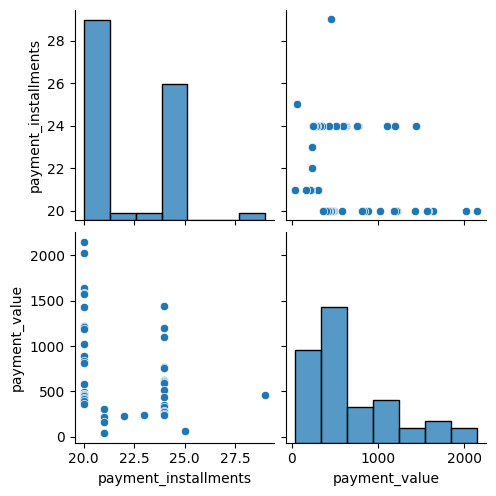

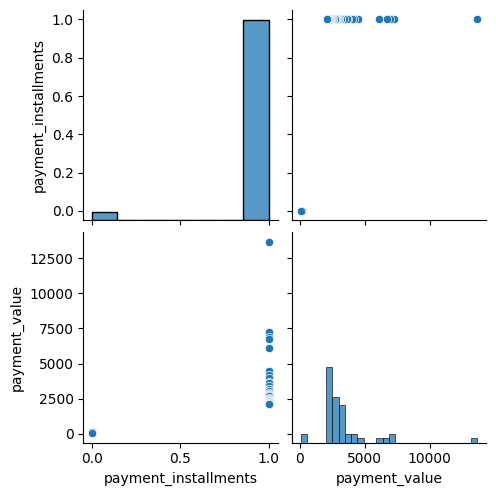

In [71]:
order_payments.head()

num_installments = (
    order_payments
    .groupby(['payment_type','order_id'])[['payment_installments','payment_value']]
    .sum()
)

high_num_installments = num_installments.sort_values( by=['payment_installments','payment_value'],ascending=[False,False]).head(50)


low_num_installments = num_installments.sort_values( by=['payment_installments','payment_value'],ascending=[True,False]).head(50)



sns.pairplot(data=high_num_installments)


sns.pairplot(data=low_num_installments)


# Installment Analysis

## High number of installments
- Almost all of the installments which are high in count have very low payment value. 
- The range of order value is under 2000.

## Low number of installments
- High value orders have 1 or 2 number of installments.
- These high value orders are in range of 2000 to 7000, and also few orders in range of 12,500 and more.
- Even tho these items price is very high they are not done in installments 


### We will futher analyze and check if high value are done using credit debit or somekind of voucher

Text(0.5, 1.0, 'Low Payment Preferred Mode')

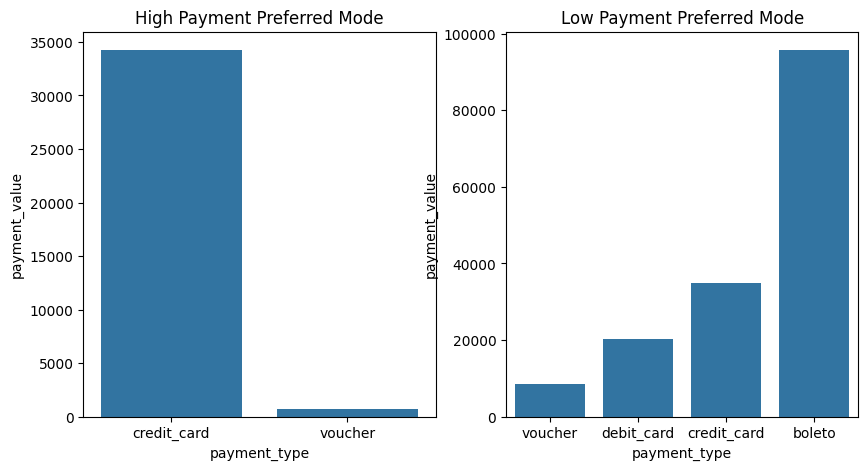

In [72]:
hp_preferred_mode = (high_num_installments.groupby('payment_type')['payment_value'].sum().sort_values(ascending=False))



lp_preferred_mode = low_num_installments.groupby('payment_type')['payment_value'].sum().sort_values()

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.barplot(data=hp_preferred_mode)
plt.title("High Payment Preferred Mode")

plt.subplot(1,2,2)
sns.barplot(data=lp_preferred_mode)
plt.title("Low Payment Preferred Mode")




##  Preferred Payment mode based on the value of the order
- This shows that people tend to do one time payment using credit card for high value items.
- As they might have low interest rates on their credit cards then to directly convert it to EMI.
- Most of the low value payment has used boleto as thier preferred payment mode.
- As boleto works good for the peoplw with no credit card and also provides secure trasactions.

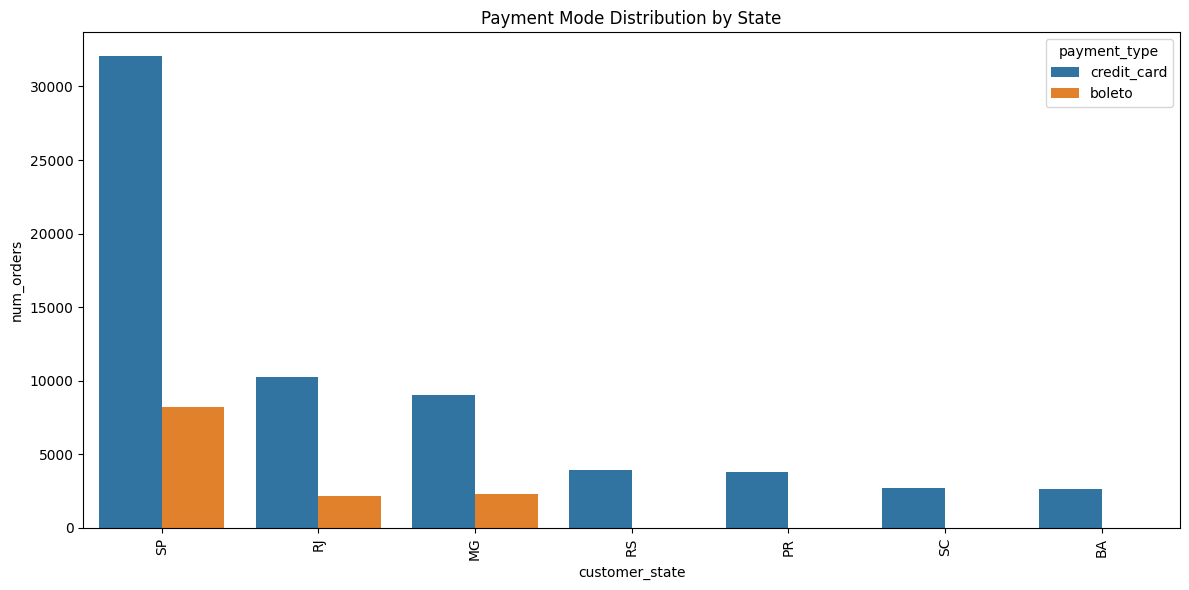

In [73]:
order_payments.head()

statelevelpayementmode = (
    orders
    .merge(order_payments, on='order_id', how='inner')
    .merge(customers, on='customer_id', how='inner')
    .groupby(['customer_state', 'payment_type'])['order_id']
    .nunique()
    .reset_index(name='num_orders')
    .sort_values(by='num_orders',ascending=False)
).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=statelevelpayementmode,
            x='customer_state',
            y='num_orders',
            hue='payment_type')
plt.xticks(rotation=90)
plt.title('Payment Mode Distribution by State')
plt.tight_layout()
plt.show()


## State wise Payment mode analysis

1. The barplot above shows us top 10 state with most numbers of order and what was the payment mode of these states.
2. Even tho `Boleto` card is very popular amongnst Brazilians, `credit card` are still hold thier spot of being used the most.
3. Only top 3 states with most orders use Boleto card, After 3rd top state we can see no state is using Boleto Card.
4. Top state with abbrevation `SP` has a order items over `30,000` and with Boleto almost `10,000` items.

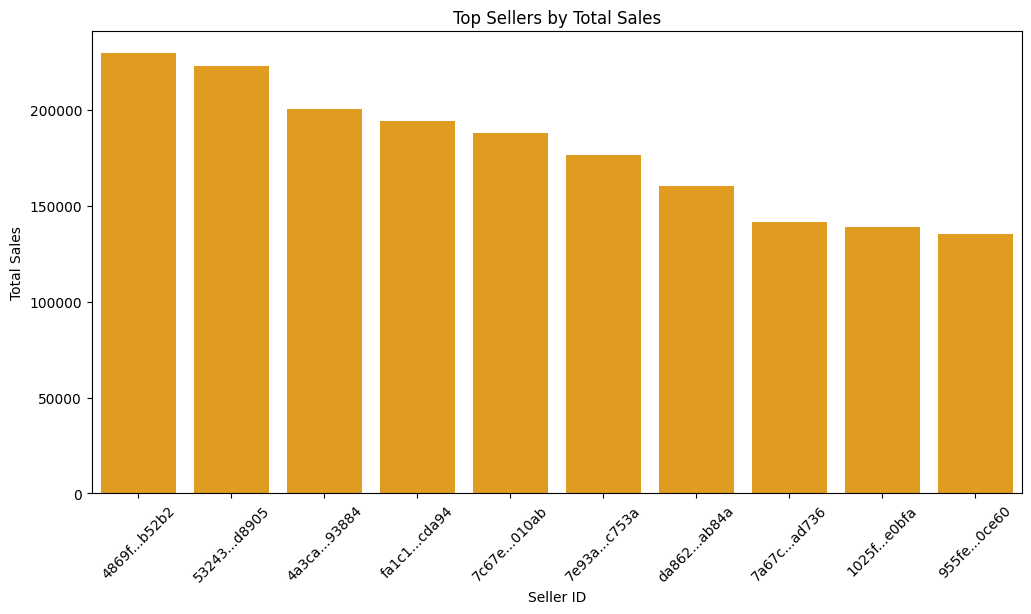

In [74]:
total_sale_sellers = order_items.groupby('seller_id')['price'].sum().reset_index()

total_sale_sellers = total_sale_sellers.sort_values(by='price', ascending=False).head(10)

total_sale_sellers['short_id'] = (
    total_sale_sellers['seller_id'].str[:5] + '...' + total_sale_sellers['seller_id'].str[-5:]
)


plt.figure(figsize=(12,6))
sns.barplot(data=total_sale_sellers, x='short_id', y='price', color='orange')
plt.title('Top Sellers by Total Sales')
plt.xlabel('Seller ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


# Top Sellers by Total Sale.

1. The barplot shows `TOP 10 Sellers by Total Sales`.
2. More than 2,00,000 amount of sale was done the top 1 company.
3. Total sales stays above 1,50,000 in the top 10 sellers.
4. We'll further see if the rating is as good as the sales of sellers.

C:\Users\User\AppData\Local\Temp\ipykernel_10260\753333852.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=final_top_seller_ratings, x='short_id', y='avg_rating', palette='coolwarm')


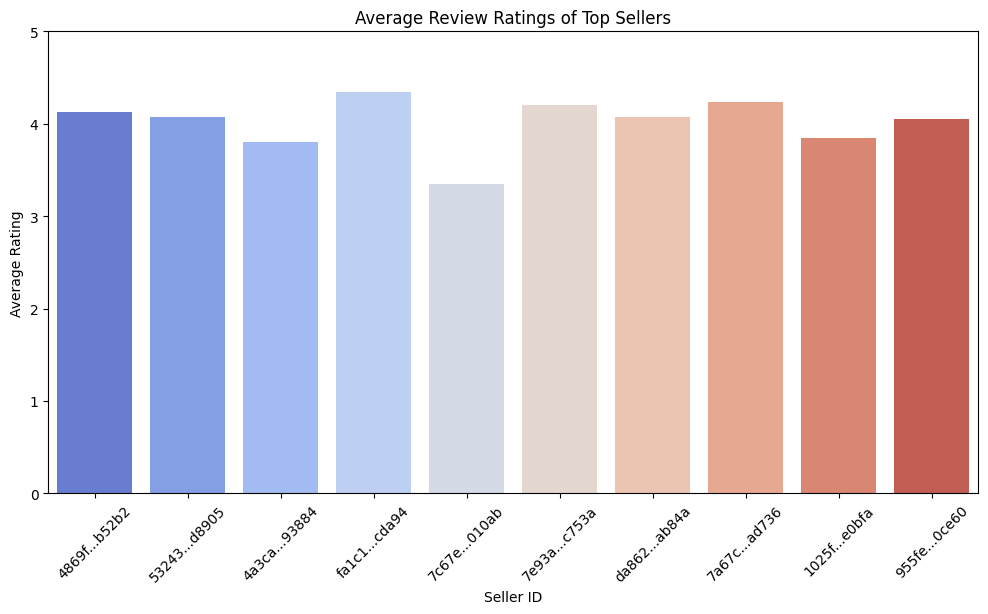

In [75]:
top_sellers = total_sale_sellers['seller_id'].tolist()



seller_ratings = (
    order_items
    .merge(order_reviews, on='order_id', how='inner')
    .groupby('seller_id')['review_score']
    .agg(['mean','count'])
    .reset_index()
    .sort_values(by='mean', ascending=False)
)

seller_ratings.columns = ['seller_id', 'avg_rating', 'num_reviews']

top_seller_ratings = seller_ratings[seller_ratings['seller_id'].isin(top_sellers)]


final_top_seller_ratings = total_sale_sellers.merge(
    top_seller_ratings,
    on='seller_id',
    how='left'
).sort_values(by='price',ascending=False)[['seller_id', 'short_id', 'price', 'avg_rating', 'num_reviews']]

lowrating = final_top_seller_ratings.iloc[4]

lowrating
lowrating_seller = lowrating['seller_id']

lowrating_seller


plt.figure(figsize=(12,6))
plt.title('Average Review Ratings of Top Sellers')
sns.barplot(data=final_top_seller_ratings, x='short_id', y='avg_rating', palette='coolwarm')
plt.xlabel('Seller ID')
plt.ylabel('Average Rating')
plt.ylim(0, 5)
plt.xticks(rotation=45)
plt.show()



final_top_seller_ratings = final_top_seller_ratings[final_top_seller_ratings['seller_id'] == lowrating_seller]

final_top_seller_ratings= (
    final_top_seller_ratings
    .merge(order_items, on='seller_id', how='inner')
    .merge(order_reviews, on='order_id', how='inner')
    )


In [76]:


col = final_top_seller_ratings['review_comment_message']

col = col.astype("object")

col = col.fillna("No Comment")

col = col.replace(r'^\s*$', 'No Comment', regex=True)

final_top_seller_ratings['review_comment_message'] = col

final_top_seller_ratings = final_top_seller_ratings[
    final_top_seller_ratings['review_comment_message'] != 'No Comment'
]

final_top_seller_ratings = final_top_seller_ratings.groupby('review_comment_message')['review_score'].mean().reset_index().sort_values(by='review_score')

final_top_seller_ratings['count_of_low_ratings'] = final_top_seller_ratings['review_comment_message'].map(final_top_seller_ratings['review_comment_message'].value_counts())


final_top_seller_ratings

total_ratings = final_top_seller_ratings['review_score'].count()
count_of_low_ratings = (final_top_seller_ratings['review_score'] < 3.0).sum()

print(final_top_seller_ratings)
print(f'Total Ratings: {total_ratings}, Count of Low Ratings (<3): {count_of_low_ratings}')


                                review_comment_message  review_score  \
490  é uma cadeira que fica o parafuso machucando a...           1.0   
39                  Ainda nao recebi minha mercadoria.           1.0   
41   Ainda não consegui receber o produto em minha ...           1.0   
42   Ainda não recebi minha compra. Já passou do pr...           1.0   
43   Ainda não recebi o produto é nenhuma satisfaçã...           1.0   
..                                                 ...           ...   
214               Muito bom para aquilo q eu precisava           5.0   
9                                                   10           5.0   
10                              100%.... aconselho!!!!           5.0   
0     A única coisa que desagradou foi que as os pa...           5.0   
475                                    recebi no prazo           5.0   

     count_of_low_ratings  
490                     1  
39                      1  
41                      1  
42                     

# Why the company has low rating but high sales
1. The sales might be high, but the reviews say a different thing.
2. It has a lot of 1 star reviews and very negative comments.
3. After translation we found those comments are:
    - Delayed Products.
    - Did not receive the products.
    - No proper support from the seller.

- These reviews suggests that this might be a scam seller that is earining revenue by scammming people in some way.
- But some people also has a positive feedback with the seller. 
- These mixed reviews makes the trust factor of the company fall.

In [77]:
from deep_translator import GoogleTranslator

def translate_comment(comment):
    try:
        translated = GoogleTranslator(source='auto', target='en').translate(comment)
        return translated
    except Exception as e:
        print(f"Translation error for comment: {comment}. Error: {e}")
        return comment  # return original if translation fails
    
order_reviews = order_reviews.sample(100)

col = order_reviews['review_comment_message']

col = col.astype("object")

col = col.fillna("No Comment")

col = col.replace(r'^\s*$', 'No Comment', regex=True)

order_reviews['review_comment_message'] = col


order_reviews['translated_comment'] = order_reviews['review_comment_message'].apply(translate_comment)
order_reviews[['review_comment_message', 'translated_comment', 'review_score']]




review_comment_message  \
40418  ACHEI TUDO PÉSSIMO, NÃO TEM IDENTIFICAÇÃO NA E...   
39879                                         No Comment   
95729                                         No Comment   
75006                     Deu tudo certo com meu pedido.   
64625                         Não entregaram meu produto   
...                                                  ...   
30015                                         No Comment   
76642                                         No Comment   
62890                                         No Comment   
90805                                         No Comment   
5782   Não recebi o produto, já enviei vários e-mail ...   

                                      translated_comment  review_score  
40418  I THINK EVERYTHING IS TERRIBLE, THERE IS NO ID...             1  
39879                                         No Comment             5  
95729                                         No Comment             5  
75006                Everything went well with my order.             5  
64625                     They didn't deliver my product             1  
...                                                  ...           ...  
30015                                         No Comment             5  
76642                                         No Comment             5  
62890                                         No Comment             3  
90805                                         No Comment             4  
5782   I didn't receive the product, I've sent severa...             1  

[100 rows x 3 columns]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\User\AppData\Local\Temp\ipykernel_10260\217415128.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=order_reviews, x='sentiment_label', order=['Positive', 'Neutral', 'Negative'], palette='Set2')


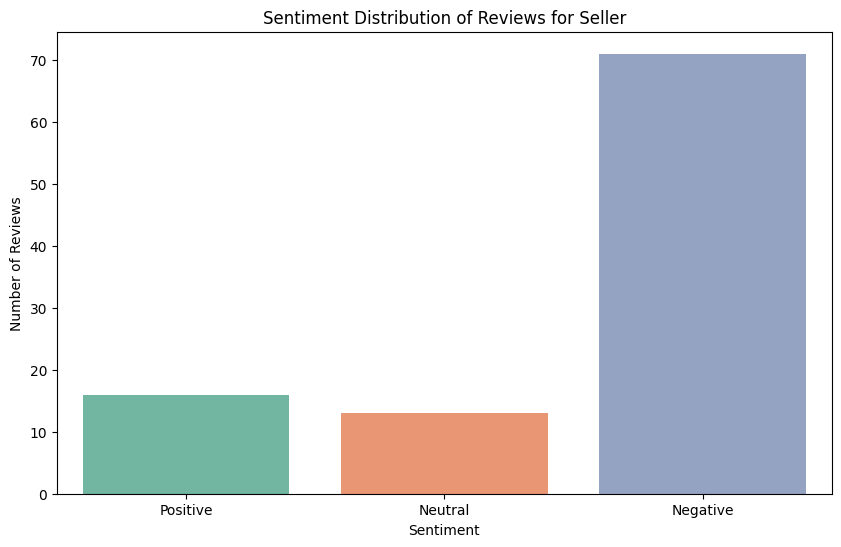

translated_comment  sentiment_score  \
40418  I THINK EVERYTHING IS TERRIBLE, THERE IS NO ID...          -0.8934   
39879                                         No Comment          -0.2960   
95729                                         No Comment          -0.2960   
75006                Everything went well with my order.           0.2732   
64625                     They didn't deliver my product           0.0000   
...                                                  ...              ...   
30015                                         No Comment          -0.2960   
76642                                         No Comment          -0.2960   
62890                                         No Comment          -0.2960   
90805                                         No Comment          -0.2960   
5782   I didn't receive the product, I've sent severa...          -0.2263   

      sentiment_label  
40418        Negative  
39879        Negative  
95729        Negative  
75006        Positive  
64625         Neutral  
...               ...  
30015        Negative  
76642        Negative  
62890        Negative  
90805        Negative  
5782         Negative  

[100 rows x 3 columns]

In [78]:
import nltk

nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

order_reviews['sentiment_score'] = order_reviews['translated_comment'].apply(lambda x: sia.polarity_scores(x)['compound'])

def label(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

order_reviews['sentiment_label'] = order_reviews['sentiment_score'].apply(label)

plt.figure(figsize=(10,6))
plt.title('Sentiment Distribution of Reviews for Seller')
sns.countplot(data=order_reviews, x='sentiment_label', order=['Positive', 'Neutral', 'Negative'], hue='sentiment_score', legend=False palette='Set2')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()



order_reviews[['translated_comment', 'sentiment_score', 'sentiment_label']]


# Sentiment analysis (100 Rows only)
 
1. For this sentiment analysis:
    - We had to fetch all the reviews.
    - Translate them into english
    - Use SentimentIntensityAnalyzer to analyze the sentiments of the reciews;
    - Give them label based up of the points.

2. After analyzing the reviews:
    - The number of negative reviews are more than triple of that of the positive reviews.
    - This is really bad for such e-commerce store.
    - very few people on an average are finding it actually helpful

3. If the bad reviews keep increasing or if the positive number of reviews do not increase it might be a major problem inthe future.

In [79]:
state_level_sellers = (
    geolocations
    .merge(sellers, left_on='customer_zip_code_prefix',right_on='seller_zip_code_prefix', how='inner')
    .groupby(['geolocation_state','seller_id'])[['geolocation_lng','geolocation_lat']]
    .mean()
    .reset_index()
    )


m = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

for _, row in state_level_sellers.iterrows():
    folium.CircleMarker(
        location=[row['geolocation_lat'], row['geolocation_lng']],
        radius=2,
        color='green',
        fill=True,
        fill_opacity=0.6,
        tiles='cartodbpositron'
    ).add_to(m)

m


# Seller Geolocations

## 1. Most of the sellers are situated in the coastal line of the Brazil.
## 2. Even more sellers are  grouped in south region of the Country.
## 3. In the amazon and the north / North western region not a lot of seller can be seen.

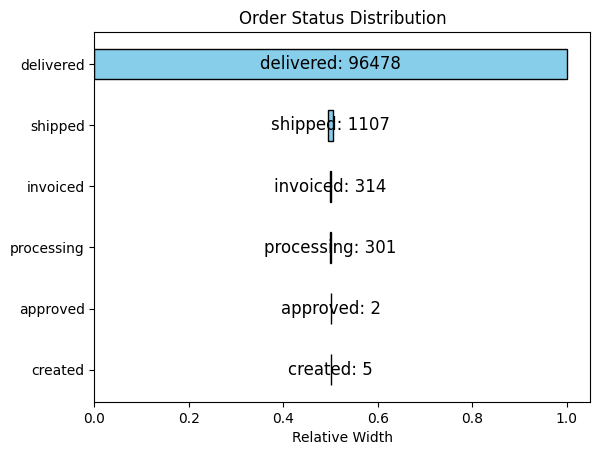

In [80]:
import numpy as np
stage_counts = (
    orders['order_status']
    .value_counts()
    .reindex(['created', 'approved', 'processing', 'invoiced', 'shipped', 'delivered'])
    .dropna()
)

stages = stage_counts.index.tolist()
values = stage_counts.values.tolist()

y_pos = np.arange(len(stages))
max_val = max(values)
w  = [v/max_val for v in values]


for i, (stage, w, val) in enumerate(zip(stages, w, values)):
    plt.barh(
        y=i,
        width=w,
        height=0.5,
        color='skyblue',
        left= (1-w)/2,
        edgecolor='black'
    )
    
    plt.text(0.5,i,f'{stage}: {val}', ha='center', va='center', color='black', fontsize=12)
plt.title('Order Status Distribution')
plt.yticks(y_pos, stages)
plt.xlabel('Relative Width')
plt.show()


# Delivery Analysis
### The chart is an historical Snapshot of the database and not a real database, Thus creating such odd numbers in the group.

1. We can see most number of orders are __delivered successfully__
2. `1107` orders are in transit.
3. `314` transactions have been invoiced and are ready to be shipped.
4. `301` orders are still in transaction and yet to be invoiced.
5. `2` orders that were created by the user are approved.
6. `5` new orders are created by the user that are going to go for the approval.